In [1]:
#question 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
TC=np.arange(0,110,10)
TF=TC*1.8+32
Df=pd.DataFrame({'Temperature in Celsius':TC,'Temperature in Farenheit':TF})
Df

,Temperature in Celsius,Temperature in Farenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


In [2]:
#question 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
%matplotlib inline
fileName = 'Volve Production Data.xlsx'
xl = pd.ExcelFile(fileName)
dailyDF=xl.parse('Daily Production Data')
conn = sqlite3.connect("VolveProduction.db")
cur = conn.cursor
dailyDF.to_sql("DailyRates", conn, if_exists="append", index = False)
WellID = (5351, 7405, 5599, 5769, 7078, 7289, 5693)


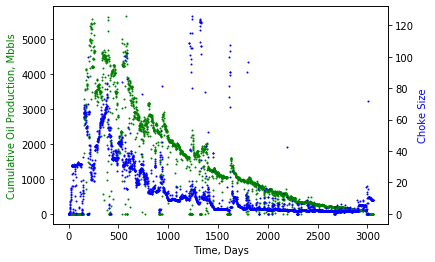

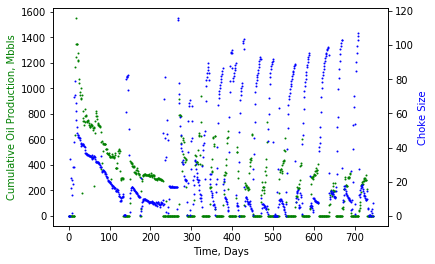

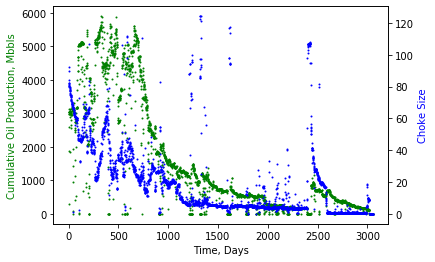

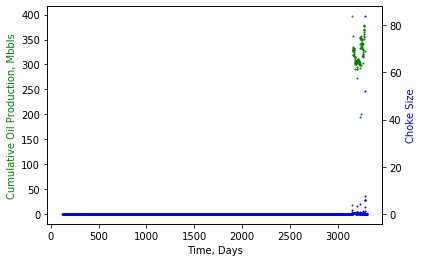

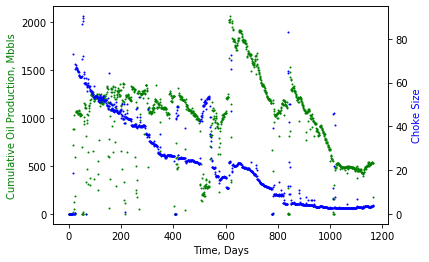

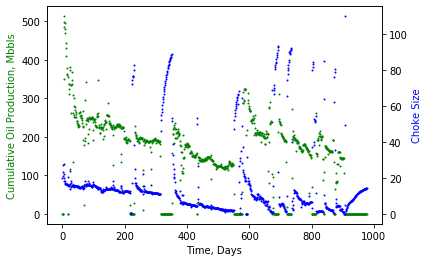

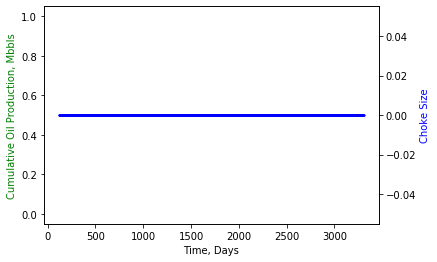

In [3]:
for x in WellID:
    testWellDF = pd.read_sql_query(f"SELECT DP_CHOKE_SIZE, BORE_OIL_VOL FROM DailyRates WHERE  NPD_WELL_BORE_CODE={x};", conn)
   
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(testWellDF['BORE_OIL_VOL'], color = "green", ls = 'None', marker = 'o', markersize = 1,)
    ax2.plot(testWellDF['DP_CHOKE_SIZE'], color = "blue", ls = 'None', marker = 'o', markersize = 1,)
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Cumulative Oil Production, Mbbls',color='g')
    ax2.set_ylabel('Choke Size', color='b')
    plt.show()